# 21064051 Nguyễn Hùng Anh

# Bài thực hành số 2

## I. Mục đích:

Để sử dụng và hiện thực các hàm cơ bản ứng dụng trong thống kê và các classifier
đơn giản với 1 đặc trưng và 2 lớp. Histogram được sử dụng để xác định biệt số
(discriminant) sao cho tối thiểu misclassification.

## II. Báo cáo:

Mỗi nhóm sẽ làm báo kết quả riêng, nộp kèm file source chương trình.

## III. Nội dung:

1. Xây dựng một phân lớp dựa trên histogram, với tập dữ liệu (tham khảo bài toán
từ Lecturer 3):

- in_time = [(0, 27), (1, 25), (2, 16), (3, 19), (4, 26), (5, 20), (6, 19), (7,
17), (8, 10), (9, 5), (10, 4), (11, 4), (12,2)]
- cls_late = [(5,3), (6, 5), (7, 8), (8, 15), (9, 17), (10, 18), (11, 19), (12,16),
(13, 9), (14, 8), (15, 8)]

Kiểm tra kết quả nếu rời nhà lúc 6:34, 6:35, 6:36, 6:37, 6:38

Rời nhà lúc 6.34: Đến ĐÚNG GIỜ
Rời nhà lúc 6.35: Đến ĐÚNG GIỜ
Rời nhà lúc 6.36: Đến ĐÚNG GIỜ
Rời nhà lúc 6.37: Đến ĐÚNG GIỜ
Rời nhà lúc 6.38: Đến ĐÚNG GIỜ


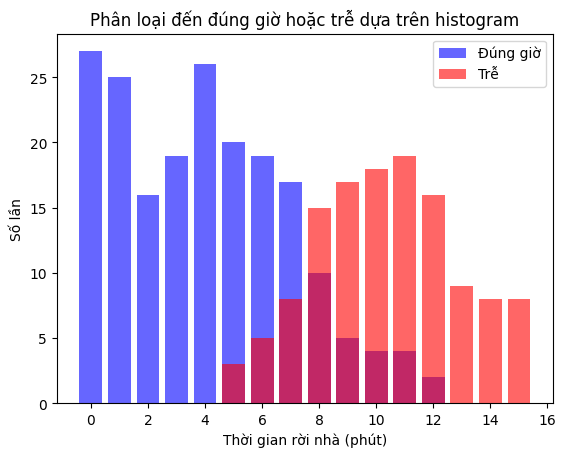

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu thời gian đến đúng giờ và trễ (số phút rời nhà, số lần)
in_time = np.array([(0, 27), (1, 25), (2, 16), (3, 19), (4, 26), (5, 20), 
                    (6, 19), (7, 17), (8, 10), (9, 5), (10, 4), (11, 4), (12, 2)])
cls_late = np.array([(5,3), (6, 5), (7, 8), (8, 15), (9, 17), (10, 18), 
                     (11, 19), (12, 16), (13, 9), (14, 8), (15, 8)])

# Chuyển dữ liệu thành dạng dictionary để tra cứu nhanh
in_time_dict = dict(in_time)
cls_late_dict = dict(cls_late)

# Tìm điểm phân biệt: 
threshold = 6.5

# Kiểm tra các trường hợp rời nhà lúc 6:34, 6:35, 6:36, 6:37, 6:38
test_times = [6.34, 6.35, 6.36, 6.37, 6.38]
for time in test_times:
    if time < threshold:
        print(f"Rời nhà lúc {time}: Đến ĐÚNG GIỜ")
    else:
        print(f"Rời nhà lúc {time}: ĐẾN TRỄ")

# Vẽ histogram
plt.bar(in_time[:,0], in_time[:,1], color='blue', label='Đúng giờ', alpha=0.6)
plt.bar(cls_late[:,0], cls_late[:,1], color='red', label='Trễ', alpha=0.6)
# plt.axvline(x=threshold, color='black', linestyle='--', label='Ngưỡng phân loại')
plt.xlabel('Thời gian rời nhà (phút)')
plt.ylabel('Số lần')
plt.legend()
plt.title('Phân loại đến đúng giờ hoặc trễ dựa trên histogram')
plt.show()

2. Xây dựng bộ phân lớp trên tập dữ liệu ‘person_data.txt’ cho các trường hợp (1)
đặc trưng chiều cao, (2) kết hợp chiều cao và tên.

In [29]:
def build_height_classifier(data):
    height_hist = {}
    for person in data:
        height = person[1]
        if height not in height_hist:
            height_hist[height] = 0
        height_hist[height] += 1
    return height_hist

def build_height_name_classifier(data):
    height_name_hist = {}
    for person in data:
        name, height = person[0], person[1]
        key = (name, height)
        if key not in height_name_hist:
            height_name_hist[key] = 0
        height_name_hist[key] += 1
    return height_name_hist

def parse_person_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            name = " ".join(parts[:-3])  # Ghép tên lại
            height = int(parts[-3])
            data.append((name, height))
    return data

# Đọc dữ liệu từ tập tin
person_data = parse_person_data('../NhanDangMau/person_data.txt')

# Xây dựng bộ phân lớp
height_classifier = build_height_classifier(person_data)
height_name_classifier = build_height_name_classifier(person_data)

# In kết quả mẫu
print("Height Classifier:", height_classifier)
print("Height & Name Classifier:", height_name_classifier)


Height Classifier: {184: 3, 171: 3, 164: 4, 169: 3, 158: 3, 178: 1, 156: 1, 155: 6, 160: 3, 175: 7, 161: 4, 181: 1, 191: 1, 199: 3, 154: 2, 195: 6, 188: 3, 153: 2, 163: 4, 159: 1, 157: 3, 189: 4, 152: 1, 173: 2, 179: 2, 174: 1, 196: 1, 151: 2, 186: 2, 190: 1, 193: 1, 192: 2, 168: 2, 177: 2, 167: 1, 166: 1, 183: 4, 198: 1, 180: 1, 200: 2, 182: 2, 162: 1}
Height & Name Classifier: {('Robert', 184): 1, ('Charlotte', 184): 1, ('Isabella', 171): 1, ('Emma', 164): 1, ('John', 169): 1, ('Amelia', 158): 1, ('Charlotte', 171): 1, ('Tom', 178): 1, ('James', 156): 1, ('Isabella', 155): 1, ('Emma', 160): 1, ('Charlotte', 175): 2, ('Mia', 175): 1, ('Ava', 161): 2, ('Mike', 181): 1, ('Robert', 191): 1, ('Olivia', 199): 1, ('Steve', 154): 1, ('Chris', 195): 1, ('Paul', 188): 1, ('Amelia', 164): 2, ('Mary', 153): 1, ('Mike', 155): 1, ('Emma', 188): 1, ('Charlotte', 163): 2, ('Mia', 171): 1, ('Mike', 195): 1, ('Ava', 159): 1, ('Chris', 160): 1, ('Robert', 195): 1, ('Mia', 157): 1, ('David', 175): 2, ('

3. Tính mean và variance của các vector đặc trưng sau:

In [17]:
import numpy as np

# Các vector đặc trưng
a = np.array([1, 2, 4, 6, 9, 10, 20, 7])
b = np.arange(0, 101, 2)
c = np.array([i**2 for i in range(1, 101, 2)]) 
d = np.array([[2, 3, 4, 5, 2], [4, 7, 6, 5, 3]]) 

# Tính trung bình (mean) cho mỗi tập dữ liệu
mean_a_manual = sum(a) / len(a)
mean_b_manual = sum(b) / len(b)
mean_c_manual = sum(c.flatten()) / c.size 

# Tính phương sai cho a
sum_sq_diff_a = 0  
for x in a:
    sum_sq_diff_a += (x - mean_a_manual) ** 2
var_a_manual = sum_sq_diff_a / (len(a) - 1)

# Tính phương sai cho b
sum_sq_diff_b = 0
for x in b:
    sum_sq_diff_b += (x - mean_b_manual) ** 2
var_b_manual = sum_sq_diff_b / (len(b) - 1)

# Tính phương sai cho c
sum_sq_diff_c = 0
for x in c.flatten():  
    sum_sq_diff_c += (x - mean_c_manual) ** 2
var_c_manual = sum_sq_diff_c / (c.size - 1)

sum_d = 0
count_d = 0

for row in d:
    for value in row:
        sum_d += value
        count_d += 1

mean_d_manual = sum_d / count_d

sum_sq_diff_d = 0

for row in d:
    for value in row:
        sum_sq_diff_d += (value - mean_d_manual) ** 2

var_d_manual = sum_sq_diff_d / (count_d - 1)

# Kết quả
(mean_a_manual, var_a_manual), (mean_b_manual, var_b_manual), (mean_c_manual, var_c_manual), (mean_d_manual, var_d_manual)

((7.375, 35.982142857142854),
 (50.0, 884.0),
 (3333.0, 9065760.0),
 (4.1, 2.7666666666666666))

4. Tính covariance matrix của các vector đặc trưng sau:

In [ ]:
# Tính covariance

# Dữ liệu
X = np.array([2, 3, 6, 3, 7, 8])
Y = np.array([5, 7, 9, 6, 7, 8])

# Bước 1: Tính trung bình của X và Y
mean_X = sum(X) / len(X)
mean_Y = sum(Y) / len(Y)

# Bước 2: Tính tổng tích độ lệch của X và Y so với trung bình
sum_cov = 0
for i in range(len(X)):
    sum_cov += (X[i] - mean_X) * (Y[i] - mean_Y)

# Bước 3: Chia cho (N - 1) để tính covariance
cov_XY = sum_cov / (len(X) - 1)

# Bước 4: Tính phương sai của X và Y để tạo ma trận hiệp phương sai
sum_sq_diff_X = sum((x - mean_X) ** 2 for x in X)
var_X = sum_sq_diff_X / (len(X) - 1)

sum_sq_diff_Y = sum((y - mean_Y) ** 2 for y in Y)
var_Y = sum_sq_diff_Y / (len(Y) - 1)

# Ma trận hiệp phương sai
cov_matrix_manual = np.array([[var_X, cov_XY], [cov_XY, var_Y]])

# Kết quả
cov_matrix_manual


array([[6.16666667, 2.6       ],
       [2.6       , 2.        ]])

5. Tạo hàm mật độ của phân bố Gauss với mean là 5 và variance là 3. Plot hàm kết
quả

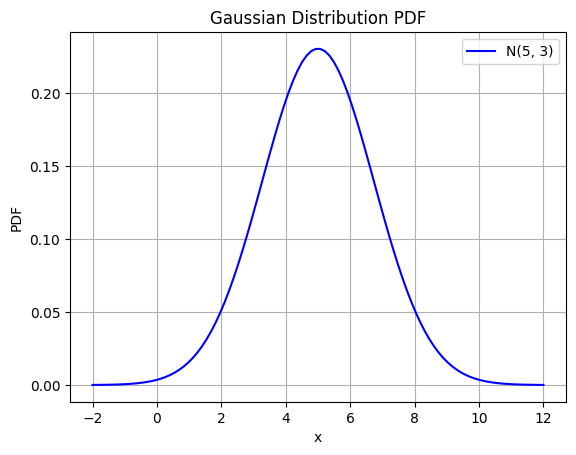

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm tính mật độ xác suất của phân bố chuẩn (Gaussian PDF)
def gaussian_pdf(x, mean, variance):
    pi = 3.141592653589793  # Giá trị gần đúng của pi
    e = 2.718281828459045  # Giá trị gần đúng của e
    
    coefficient = 1 / ((2 * pi * variance) ** 0.5)  # Hệ số chuẩn hóa
    exponent = e ** (-((x - mean) ** 2) / (2 * variance))  # Phần mũ của e
    
    return coefficient * exponent

# Tạo dải giá trị x để vẽ đồ thị
x_values = np.linspace(-2, 12, 100)  # Lấy 100 điểm từ -2 đến 12
mean = 5
variance = 3

# Tính giá trị PDF cho từng điểm x
pdf_values = [gaussian_pdf(x, mean, variance) for x in x_values]

# Vẽ đồ thị
plt.plot(x_values, pdf_values, color="blue", label="N(5, 3)")
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Gaussian Distribution PDF")
plt.legend()
plt.grid(True)
plt.show()


6. Tạo hàm mật độ của phân bố Gauss khác với mean là 2 và variance là 1.5. Plot
hàm này trong cùng cửa sổ với hàm được tạo ra ở câu 3. Cho nhận xét.


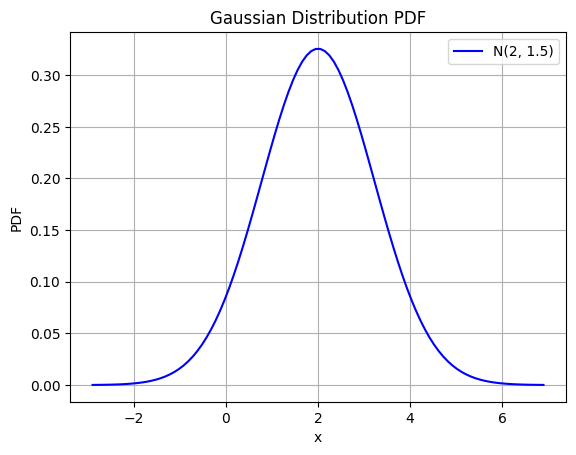

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Định nghĩa các tham số
mean = 2
variance = 1.5
std_dev = np.sqrt(variance)  # Độ lệch chuẩn

# Tạo tập giá trị x
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

# Tính mật độ xác suất
pdf_values = norm.pdf(x, mean, std_dev)

# Vẽ đồ thị
plt.plot(x, pdf_values, label=f'N({mean}, {variance})', color='b')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Gaussian Distribution PDF')
plt.legend()
plt.grid()
plt.show()

Nhận xét: 


Dạng chuông đối xứng:
- Đường cong có hình dạng đặc trưng của phân phối chuẩn, đối xứng quanh giá trị trung bình.

Giá trị trung bình (𝜇 = 2):
- Đỉnh của đồ thị đạt giá trị cao nhất tại 𝑥 = 2 đúng với trung bình đã cho.

Độ lệch chuẩn (𝜎 = 1.5):

- Độ rộng của đồ thị phản ánh độ lệch chuẩn  σ=1.5.
- Giá trị phân phối tập trung nhiều nhất quanh [2−1.5,2+1.5]=[0.5,3.5].

Giá trị xác suất giảm nhanh khi xa trung bình:
- Khi x đi xa khỏi 2 (cả hai phía), xác suất nhanh chóng tiến về 0, đúng với tính chất của phân phối chuẩn.

7. Tạo hàm mật độ phân bố Gauss 2 chiều với mean [1 3] và variance [2 2]. Plot hàm
này trên lưới [-10 10] x [-10 10] và tính khoảng cách Mahalanobis đối với các
mẫu [0 0], [3 4], và [1 2].

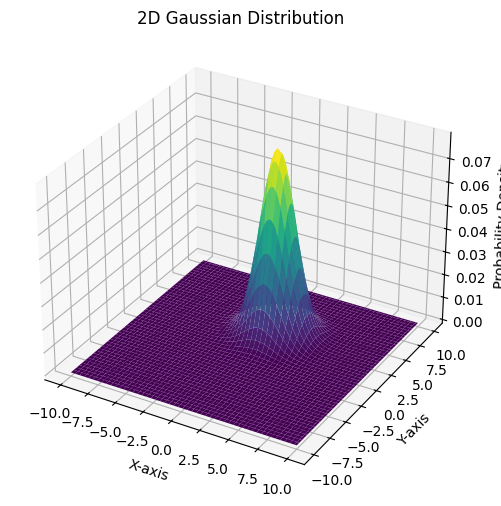

[2.23606797749979, 1.5811388300841898, 0.7071067811865476]

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm tính mật độ xác suất của phân bố Gaussian 2 chiều
def gaussian_2d(x, y, mean, variance):
    pi = 3.141592653589793  # Giá trị gần đúng của pi
    e = 2.718281828459045  # Giá trị gần đúng của e
    
    mean_x, mean_y = mean
    var_x, var_y = variance
    
    coeff = 1 / (2 * pi * (var_x * var_y) ** 0.5)
    exp_term = e ** (-((x - mean_x) ** 2 / (2 * var_x) + (y - mean_y) ** 2 / (2 * var_y)))
    
    return coeff * exp_term

# Tạo lưới [-10, 10] x [-10, 10]
x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_values, y_values)

# Mean và variance
mean = [1, 3]
variance = [2, 2]

# Tính giá trị PDF
Z = np.array([[gaussian_2d(x, y, mean, variance) for x in x_values] for y in y_values])

# Vẽ đồ thị
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis")

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Probability Density")
ax.set_title("2D Gaussian Distribution")

plt.show()

# Tính khoảng cách Mahalanobis
def mahalanobis_distance(point, mean, variance):
    dx, dy = point[0] - mean[0], point[1] - mean[1]
    return ((dx ** 2 / variance[0]) + (dy ** 2 / variance[1])) ** 0.5

samples = [[0, 0], [3, 4], [1, 2]]
mahalanobis_distances = [mahalanobis_distance(sample, mean, variance) for sample in samples]

mahalanobis_distances


8. Xây dựng bộ classifier sử dụng 1 đặc trưng có sẳn.
• Load data:
- Load 2 file tương ứng cho 2 class là: class1.txt và class2.txt.
- Cho biết số mẫu và số đặc trưng của mỗi class.
- Tính mean, variance, và covariance của các vector đặc trưng.
- Trích chọn 1 đặc trưng.

In [44]:
import scipy.io

# Load dữ liệu
train1 = scipy.io.loadmat("../NhanDangMau/class1_train.mat")["class1_train"]
test1  = scipy.io.loadmat("../NhanDangMau/class1_test.mat")["class1_test"]

train2 = scipy.io.loadmat("../NhanDangMau/class2_train.mat")["class2_train"]
test2  = scipy.io.loadmat("../NhanDangMau/class2_test.mat")["class2_test"]

# In số mẫu và số đặc trưng
print("Class 1 Train:", train1.shape)
print("Class 1 Test:", test1.shape)
print("Class 2 Train:", train2.shape)
print("Class 2 Test:", test2.shape)


def compute_statistics(data):
    mean = np.mean(data, axis=0)  # Trung bình
    variance = np.var(data, axis=0)  # Phương sai
    covariance = np.cov(data.T)  # Ma trận hiệp phương sai
    return mean, variance, covariance

# Tính toán cho mỗi class
mean1, var1, cov1 = compute_statistics(train1)
mean2, var2, cov2 = compute_statistics(train2)

# In kết quả
print("Mean Class 1:", mean1)
print("Variance Class 1:", var1)
print("Covariance Matrix Class 1:\n", cov1)

print("\nMean Class 2:", mean2)
print("Variance Class 2:", var2)
print("Covariance Matrix Class 2:\n", cov2)

feature_idx = 0  # Đặc trưng thứ 1
feature1_train = train1[:, feature_idx]
feature2_train = train2[:, feature_idx]

feature1_test = train1[:, feature_idx]
feature2_test = train2[:, feature_idx]

# In 5 giá trị đầu tiên
print("Feature 1 - Class 1:", feature1_train[:5])
print("Feature 1 - Class 2:", feature2_train[:5])



Class 1 Train: (100, 2)
Class 1 Test: (100, 2)
Class 2 Train: (100, 2)
Class 2 Test: (100, 2)
Mean Class 1: [1.97909027 2.97947776]
Variance Class 1: [2.45542929 2.42261779]
Covariance Matrix Class 1:
 [[2.4802316  0.08304637]
 [0.08304637 2.44708868]]

Mean Class 2: [ 3.01056198 -2.87167377]
Variance Class 2: [1.87601153 2.62194738]
Covariance Matrix Class 2:
 [[ 1.89496114 -0.31990908]
 [-0.31990908  2.64843169]]
Feature 1 - Class 1: [0.74373808 5.02759017 1.02111231 2.14042766 4.02936596]
Feature 1 - Class 2: [5.06437139 4.55579243 1.02138444 2.7157843  1.8245712 ]


• Xây dựng classifier ứng với 1 đặc trưng được chọn:
- Chia tập dữ liệu thành 2 tập con, tập huấn luyện gồm 50%.
- Tính histogram và plot:
- Xác định giá trị biệt số (ngưỡng). Ứng với histogram được tính, chọn biệt số
sao cho giá trị misclassification là nhỏ nhất.
- Đánh giá trên tập dữ liệu test: ứng với giá trị ngưỡng được chọn (biệt số),
chúng ta cần phải đánh giá trên 1 tập dữ liệu khác (dữ liệu không được dùng
trong huấn luyện); tập dữ liệu test. Dựa vào các giá trị đặc trưng tưng ứng cho
các mẫu test và giá trị ngưỡng được xác định, tính phần trăm lỗi.

Tương tự, thực nghiệm với các cách phân chia tập dữ liệu khác nhau (tập dữ liệu
huấn luyện là 60%, 70%, và 80%) và các bin của histogram khác nhau.
Cho biết đặc trưng có khả năng phân loại tốt nhất.

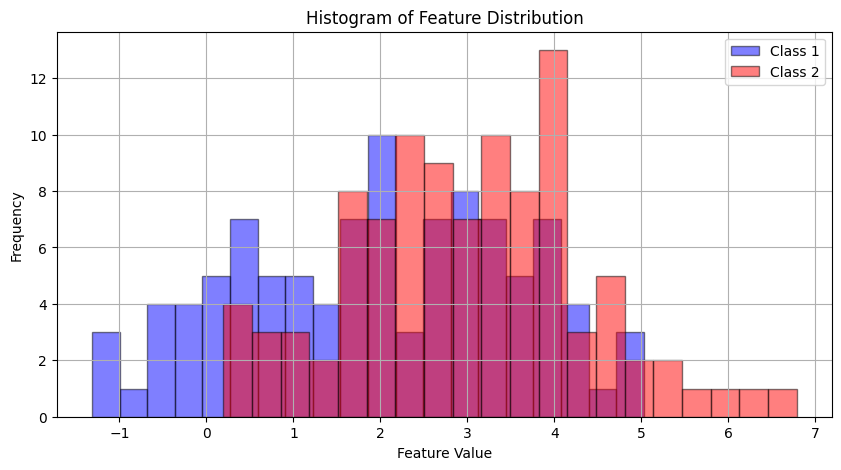

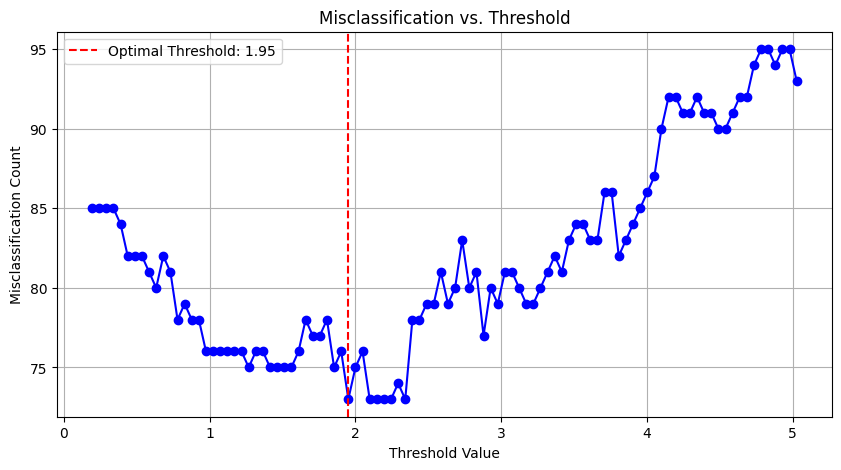

Optimal Threshold: 1.95
Minimum Misclassification on Train Set: 73
Test Error: 73
Test Error Rate: 36.50%


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Vẽ histogram của tập huấn luyện
plt.figure(figsize=(10, 5))
plt.hist(feature1_train, bins=20, alpha=0.5, color='blue', label='Class 1', edgecolor='black')
plt.hist(feature2_train, bins=20, alpha=0.5, color='red', label='Class 2', edgecolor='black')
plt.xlabel("Feature Value")
plt.ylabel("Frequency")
plt.title("Histogram of Feature Distribution")
plt.legend()
plt.grid()
plt.show()

# Tìm khoảng chồng lấn giữa 2 lớp
min_overlap = max(min(feature1_train), min(feature2_train))
max_overlap = min(max(feature1_train), max(feature2_train))

# Chia khoảng thành các điểm thử nghiệm
thresholds = np.linspace(min_overlap, max_overlap, 100)

# Tính số lượng mẫu bị phân loại sai cho từng ngưỡng
misclassification_errors = []

for T in thresholds:
    false_pos = np.sum(feature1_train > T)  # Class 1 bị gán nhầm thành Class 2
    false_neg = np.sum(feature2_train <= T) # Class 2 bị gán nhầm thành Class 1
    total_error = false_pos + false_neg
    misclassification_errors.append(total_error)

# Tìm ngưỡng tối ưu
optimal_threshold = thresholds[np.argmin(misclassification_errors)]
min_error = min(misclassification_errors)

# Vẽ biểu đồ lỗi
plt.figure(figsize=(10, 5))
plt.plot(thresholds, misclassification_errors, marker='o', linestyle='-', color='blue')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f"Optimal Threshold: {optimal_threshold:.2f}")
plt.xlabel("Threshold Value")
plt.ylabel("Misclassification Count")
plt.title("Misclassification vs. Threshold")
plt.legend()
plt.grid()
plt.show()

# 🔹 Đánh giá trên tập test
false_pos_test = np.sum(feature1_test > optimal_threshold)  # Class 1 bị gán sai
false_neg_test = np.sum(feature2_test <= optimal_threshold) # Class 2 bị gán sai
test_error = false_pos_test + false_neg_test
test_error_rate = (test_error / (len(feature1_test) + len(feature2_test))) * 100

# In kết quả
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Minimum Misclassification on Train Set: {min_error}")
print(f"Test Error: {test_error}")
print(f"Test Error Rate: {test_error_rate:.2f}%")


9. Thực hiện tương tự như bài 8 với 2 tập dữ liệu là cross (cross.dat) và twoclass
(twoclass.dat). Chú ý dữ liệu cho các class đều gom chung 1 file và 2 đặc trưng
cuối để chỉ ra class, ví dụ [1 0] tương ứng cho class1 và [0 1] tương ứng cho
class2.

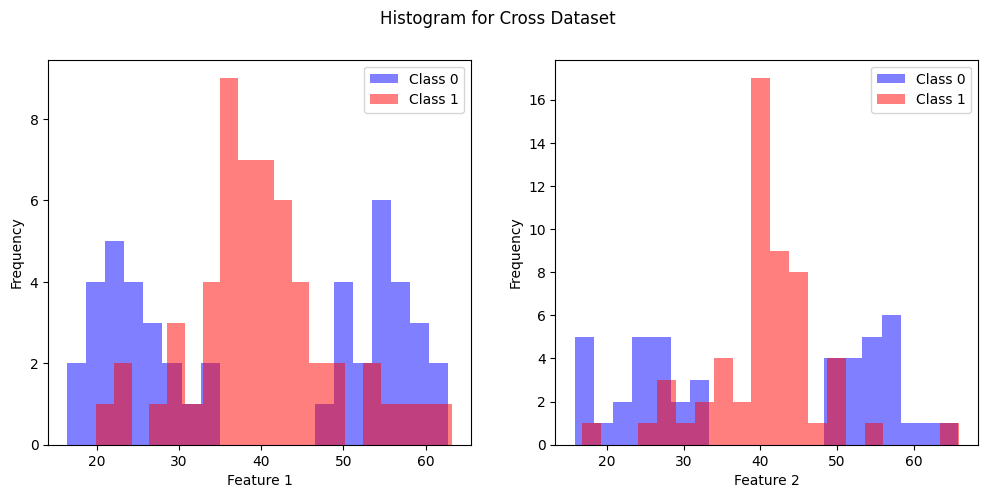

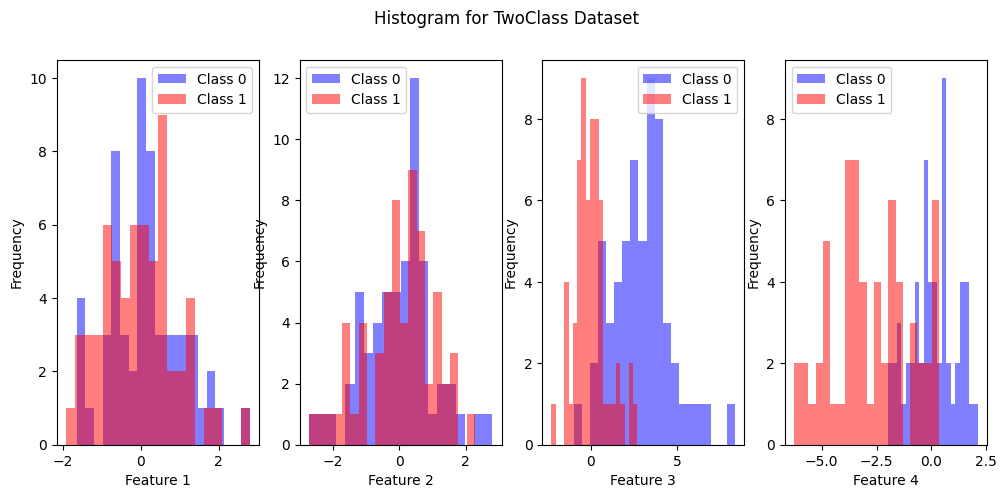

((1, 32.043167, 33.0), (1, -0.719014, 52.892561983471076))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :-2]  # Các đặc trưng
    y = data[:, -2:]  # Nhãn (one-hot encoded)
    labels = np.argmax(y, axis=1)  # Chuyển sang dạng nhãn 0, 1
    return X, labels

# Chia tập dữ liệu thành 50% train và 50% test
def split_data(X, y, test_size=0.5):
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)  # Xáo trộn dữ liệu
    split_idx = int(n_samples * (1 - test_size))
    
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], y[train_idx], X[test_idx], y[test_idx]

# Vẽ histogram
def plot_histogram(X, labels, title):
    plt.figure(figsize=(12, 5))
    for i in range(X.shape[1]):
        plt.subplot(1, X.shape[1], i + 1)
        plt.hist(X[labels == 0, i], bins=20, alpha=0.5, label="Class 0", color='b')
        plt.hist(X[labels == 1, i], bins=20, alpha=0.5, label="Class 1", color='r')
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel('Frequency')
        plt.legend()
    plt.suptitle(title)
    plt.show()

# Xác định ngưỡng phân biệt dựa trên histogram
def find_optimal_threshold(X_train, y_train):
    best_threshold = None
    min_misclassification = float('inf')
    best_feature = None

    for i in range(X_train.shape[1]):
        values = np.sort(X_train[:, i])
        for threshold in values:
            predictions = (X_train[:, i] > threshold).astype(int)
            misclassification = np.sum(predictions != y_train)
            
            if misclassification < min_misclassification:
                min_misclassification = misclassification
                best_threshold = threshold
                best_feature = i
    
    return best_feature, best_threshold, min_misclassification

# Đánh giá mô hình trên tập test
def evaluate_threshold(X_test, y_test, feature, threshold):
    predictions = (X_test[:, feature] > threshold).astype(int)
    misclassification = np.sum(predictions != y_test)
    error_rate = misclassification / len(y_test) * 100
    return error_rate

# Xử lý dữ liệu cross.dat
cross_path = "../NhanDangMau/cross.dat"
X_cross, y_cross = load_data(cross_path)
X_train_cross, y_train_cross, X_test_cross, y_test_cross = split_data(X_cross, y_cross)

plot_histogram(X_train_cross, y_train_cross, "Histogram for Cross Dataset")
feature_cross, threshold_cross, misclass_cross = find_optimal_threshold(X_train_cross, y_train_cross)
error_cross = evaluate_threshold(X_test_cross, y_test_cross, feature_cross, threshold_cross)

# Xử lý dữ liệu twoclass.dat
twoclass_path = "../NhanDangMau/twoclass.dat"
X_twoclass, y_twoclass = load_data(twoclass_path)
X_train_twoclass, y_train_twoclass, X_test_twoclass, y_test_twoclass = split_data(X_twoclass, y_twoclass)

plot_histogram(X_train_twoclass, y_train_twoclass, "Histogram for TwoClass Dataset")
feature_twoclass, threshold_twoclass, misclass_twoclass = find_optimal_threshold(X_train_twoclass, y_train_twoclass)
error_twoclass = evaluate_threshold(X_test_twoclass, y_test_twoclass, feature_twoclass, threshold_twoclass)

(feature_cross, threshold_cross, error_cross), (feature_twoclass, threshold_twoclass, error_twoclass)
